In [1]:
conda install scikit-learn

Retrieving notices: ...working... done
Channels:
 - defaults
Platform: osx-arm64
Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - scikit-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2025.2.25  |       hca03da5_0         131 KB
    certifi-2025.4.26          |  py312hca03da5_0         158 KB
    conda-24.11.3              |  py312hca03da5_0         1.2 MB
    openssl-3.0.16             |       h02f6b3c_0         4.3 MB
    scikit-learn-1.6.1         |  py312h313beb8_0         9.8 MB
    ------------------------------------------------------------
                                           Total:        15.6 MB

The following packages will be UPDATED:

  ca-certificates                      2024.9.24-hca03da5_0 --> 2025.2.25-hca03da5_0 
  certifi                         2024.8.30-py312hca03da5_0

In [8]:
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn

In [19]:
df = pd.read_csv('cleaned_data.csv')

In [20]:
df.describe()

,Age_in_years,Age_in_months,Body_length,Weight,Owner_play_time_minutes,Sleep_time_hours,Latitude,Longitude
count,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000
mean,4.984855,59.817931,45.322759,5.725186,22.322759,15.852414,44.240857,-65.248047
std,2.609026,31.308878,16.411763,2.287228,10.685514,2.571413,4.882001,44.503271
min,0.080000,1.000000,10.000000,0.500000,0.000000,10.000000,37.774930,-123.116226
25%,3.000000,36.000000,36.000000,4.100000,13.000000,14.000000,40.714270,-87.623177
50%,5.080000,61.000000,43.000000,5.450000,22.000000,16.000000,42.358430,-74.005970
75%,7.170000,86.000000,52.000000,7.270000,30.000000,18.000000,47.606210,-2.991573
max,11.250000,135.000000,102.000000,11.700000,60.000000,22.000000,53.800755,13.404954


In [21]:
df.rename(columns= {'Age_in_years':'Age_Year', 'Sleep_time_hours': 'Sleep'} )

,Breed,Age_Year,Age_in_months,Gender,Neutered_or_spayed,Body_length,Weight,Fur_colour_dominant,Fur_pattern,Eye_colour,Allowed_outdoor,Preferred_food,Owner_play_time_minutes,Sleep,Country,Latitude,Longitude
0,Angora,0.25,3.0,female,False,19.0,2.0,white,solid,blue,FALSE,wet,46.0,16.0,France,43.296482,5.36978
1,Angora,0.33,4.0,male,False,19.0,2.5,white,solid,blue,FALSE,wet,48.0,16.0,France,43.611660,3.87771
2,Angora,1.25,15.0,female,True,26.0,3.4,white,solid,blue,FALSE,wet,25.0,15.0,France,43.296482,5.36978
3,Angora,5.33,64.0,male,True,44.0,4.6,white,solid,blue,TRUE,wet,20.0,16.0,France,44.837789,-0.57918
4,Angora,2.25,27.0,male,False,38.0,4.6,red/cream,tabby,blue,FALSE,wet,11.0,14.0,France,44.837789,-0.57918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
720,Angora,3.67,44.0,male,False,37.0,4.6,white,solid,amber,FALSE,wet,32.0,14.0,France,43.611660,3.87771
721,Angora,3.75,45.0,male,True,43.0,3.9,white,solid,blue,FALSE,wet,38.0,14.0,USA,39.290380,-76.61219
722,Angora,3.83,46.0,male,False,37.0,4.1,white,solid,green,FALSE,wet,38.0,16.0,USA,38.895110,-77.03637
723,Angora,3.83,46.0,male,True,40.0,4.8,black,bicolor,amber,TRUE,wet,11.0,15.0,USA,40.714270,-74.00597


In [22]:
df = df.drop(['Age_in_months', ], axis=1)

In [23]:
df.describe()

,Age_in_years,Body_length,Weight,Owner_play_time_minutes,Sleep_time_hours,Latitude,Longitude
count,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000
mean,4.984855,45.322759,5.725186,22.322759,15.852414,44.240857,-65.248047
std,2.609026,16.411763,2.287228,10.685514,2.571413,4.882001,44.503271
min,0.080000,10.000000,0.500000,0.000000,10.000000,37.774930,-123.116226
25%,3.000000,36.000000,4.100000,13.000000,14.000000,40.714270,-87.623177
50%,5.080000,43.000000,5.450000,22.000000,16.000000,42.358430,-74.005970
75%,7.170000,52.000000,7.270000,30.000000,18.000000,47.606210,-2.991573
max,11.250000,102.000000,11.700000,60.000000,22.000000,53.800755,13.404954


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df.drop('Sleep_time_hours', axis=1)
y = df['Sleep_time_hours']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

preds = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, preds))
print("R²:", r2_score(y_test, preds))


MSE: 6.550505796467275
R²: 0.06877546133279822


In [26]:
df.tail()

,Breed,Age_in_years,Gender,Neutered_or_spayed,Body_length,Weight,Fur_colour_dominant,Fur_pattern,Eye_colour,Allowed_outdoor,Preferred_food,Owner_play_time_minutes,Sleep_time_hours,Country,Latitude,Longitude
720,Angora,3.67,male,False,37.0,4.6,white,solid,amber,FALSE,wet,32.0,14.0,France,43.61166,3.87771
721,Angora,3.75,male,True,43.0,3.9,white,solid,blue,FALSE,wet,38.0,14.0,USA,39.29038,-76.61219
722,Angora,3.83,male,False,37.0,4.1,white,solid,green,FALSE,wet,38.0,16.0,USA,38.89511,-77.03637
723,Angora,3.83,male,True,40.0,4.8,black,bicolor,amber,TRUE,wet,11.0,15.0,USA,40.71427,-74.00597
724,Angora,4.17,female,True,35.0,2.8,white,solid,amber,TRUE,dry,28.0,14.0,USA,45.52345,-122.67621


In [28]:
categorical_cols = ['Breed','Gender', 'Neutered_or_spayed', 'Fur_colour_dominant', 'Fur_pattern', 'Eye_colour', 'Allowed_outdoor','Preferred_food','Country']  # example
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


In [30]:
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})
print(coef_df.sort_values(by="Coefficient", key=abs, ascending=False))


                                              Feature  Coefficient
9                                    Breed_Maine loon     5.389506
19                          Fur_colour_dominant_lilac    -3.219165
12                                   Breed_maine coon     3.005961
42                                 Country_my country    -2.597962
34  Allowed_outdoor_I dont allow her outside. I'm ...     2.234114
39                                         Country_UK    -1.765702
38                                    Country_Germany    -1.451619
37                                     Country_France    -1.389498
8                                    Breed_Maine coon     1.195978
11                                      Breed_Ragdoll     1.124877
13                                    Breed_rack doll     1.068419
33                                  Eye_colour_yellow     1.031607
14                                      Breed_ragdoll    -0.907386
31                                    Eye_colour_cute    -0.85

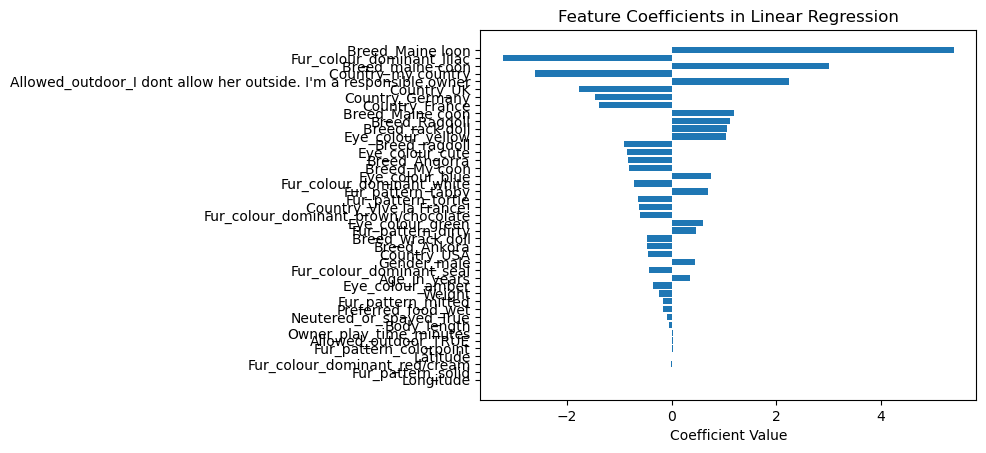

In [32]:
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", key=abs, ascending=True)

plt.barh(coef_df["Feature"], coef_df["Coefficient"])
plt.xlabel("Coefficient Value")
plt.title("Feature Coefficients in Linear Regression")
plt.show()


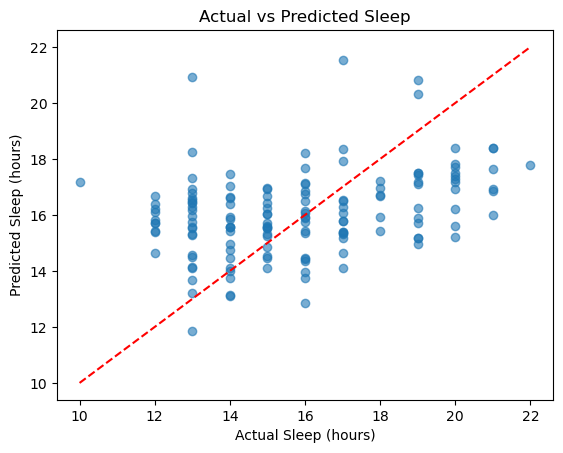

In [33]:
plt.scatter(y_test, preds, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.xlabel('Actual Sleep (hours)')
plt.ylabel('Predicted Sleep (hours)')
plt.title('Actual vs Predicted Sleep')
plt.show()

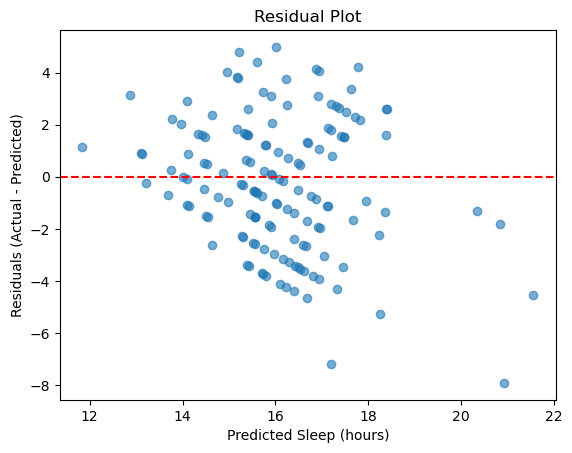

In [34]:
residuals = y_test - preds

plt.scatter(preds, residuals, alpha=0.6)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Sleep (hours)')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot')
plt.show()


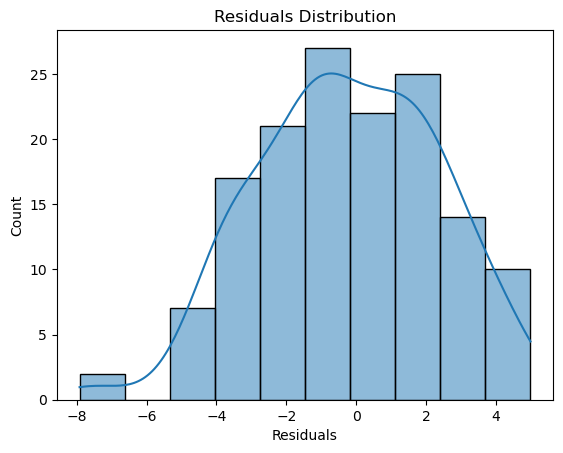

In [35]:
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Residuals Distribution')
plt.show()

In [37]:
sample_data = X_test.head(5)
sample_preds = model.predict(sample_data)

print("Sample inputs:")
print(sample_data)
print("\nActual sleep hours:")
print(y_test.head(5).values)
print("\nPredicted sleep hours:")
print(sample_preds)


Sample inputs:
     Age_in_years  Body_length  Weight  Owner_play_time_minutes   Latitude  \
326          8.58         86.0   10.00                     35.0  40.714270   
518          5.58         52.0    7.55                     26.0  50.110924   
554          6.50         46.0    7.54                      1.0  51.507351   
33           4.17         35.0    2.80                     28.0  45.523450   
375          3.08         25.0    4.50                     19.0  52.520008   

      Longitude  Breed_Angorra  Breed_Ankora  Breed_Maine coon  \
326  -74.005970          False         False              True   
518    8.682127          False         False             False   
554   -0.127758          False         False             False   
33  -122.676210          False         False             False   
375   13.404954          False         False             False   

     Breed_Maine loon  ...  Eye_colour_yellow  \
326             False  ...               True   
518             False

### 
Use Cases
- Pet owners can use this model to understand key factors that affect their kitty's sleep.
- Predict how changes in playtime or body metrics might impact sleep hours.

Limitations
- Model assumes linear relationships.
- Data size could be larger for better generalization.
- Categorical variables may need better encoding or feature engineering.

Next Steps
- Try non-linear models like Random Forest or XGBoost.
- Collect more data to improve model robustness.
- Explore additional features like diet or environment.
###

# Figure out how this all works tomorrow (6/3)